## Benchmarking Results

| Approach | R-squared | MSE | MAE |
| -------- | --------- | --- | --- |
| RF | 0.60 | 44.49 | 5.37 |
| GPR | 0.56 | 49.73 | 5.67 |
| ICL_finetuned | 0.34 | 75.66 | 6.53 |
| ICL | 0.28 | 81.64 | 6.77 |


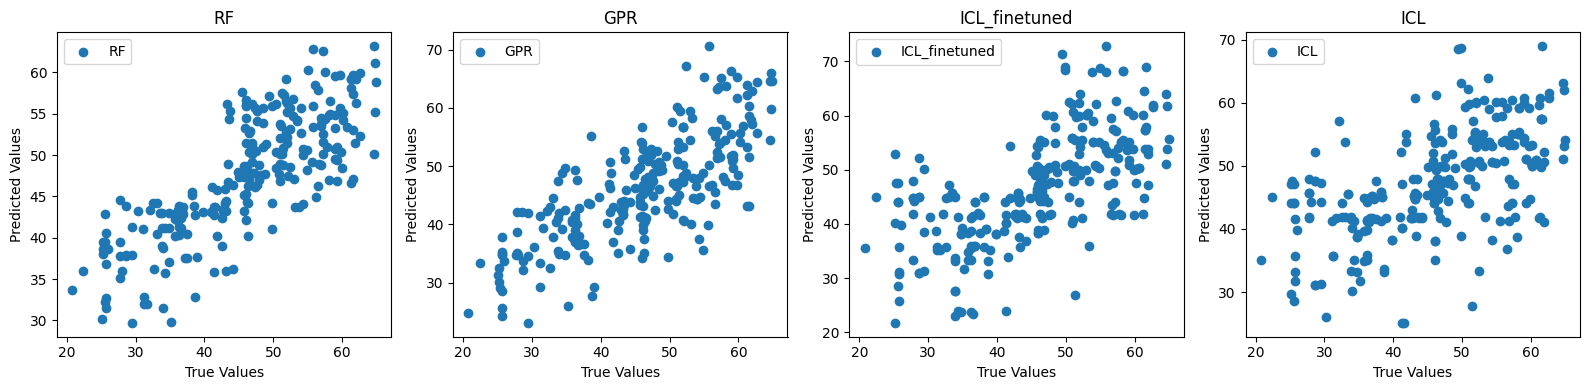

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from IPython.display import Markdown, display

def read_and_evaluate(folder_name):
    file_path = os.path.join("results", folder_name, "test.csv")
    df = pd.read_csv(file_path)
    if folder_name in ["GPR", "RF"]:
        true_values = df["True Values"]
        predicted_values = df["Predicted Values"]
    else:
        true_values = df["True Value"]
        predicted_values = df["Prediction"]

    r_squared = r2_score(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)

    return {"R-squared": r_squared, "MSE": mse, "MAE": mae}

def plot_scatter(folder_name, ax):
    file_path = os.path.join("results", folder_name, "test.csv")
    df = pd.read_csv(file_path)
    if folder_name in ["GPR", "RF"]:
        true_values = df["True Values"]
        predicted_values = df["Predicted Values"]
    else:
        true_values = df["True Value"]
        predicted_values = df["Prediction"]

    ax.scatter(true_values, predicted_values, label=folder_name)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.legend()
    ax.set_title(folder_name)

approaches = ["RF", "GPR", "ICL_finetuned", "ICL"]

results = {}

for approach in approaches:
    results[approach] = read_and_evaluate(approach)

results_df = pd.DataFrame(results).transpose()

markdown_table = "| Approach | R-squared | MSE | MAE |\n"
markdown_table += "| -------- | --------- | --- | --- |\n"

for index, row in results_df.iterrows():
    markdown_table += f"| {index} | {row['R-squared']:.2f} | {row['MSE']:.2f} | {row['MAE']:.2f} |\n"

display(Markdown("## Benchmarking Results"))
display(Markdown(markdown_table))

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

plot_scatter("RF", axes[0])
plot_scatter("GPR", axes[1])
plot_scatter("ICL_finetuned", axes[2])
plot_scatter("ICL", axes[3])

plt.tight_layout()
plt.show()
